# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

# <font color = 'red'> Step 1 

### Importing data

In [2]:
df = pd.read_csv('delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# <font color = 'red'> Step 2

### Performing EDA On Data

#### Renaming columns

In [3]:
df1 = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Checking Data

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [43]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Checking for Null Values

In [44]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### Checking for Duplicate Values

In [45]:
df[df.duplicated()].shape

(0, 2)

In [46]:
df[df.duplicated()]

,Delivery Time,Sorting Time


# <font color = 'red'> Step 3

### Checking for Homoscedasticity or Hetroscedasticity

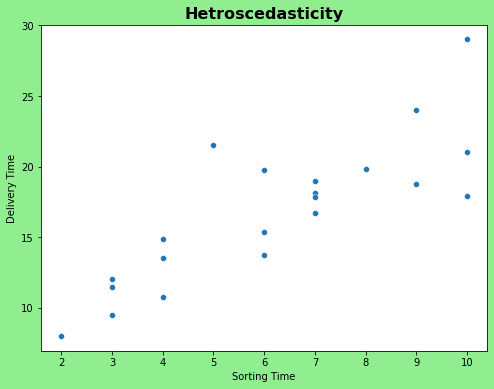

In [47]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['Sorting Time'], y = df['Delivery Time'])
plt.title('Hetroscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [112]:
df.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

## <font color='red'>As you can see in above graph 
+ It shows as the Sorting Time Increases Delivery Time also increases with much variation along the way 
+ The data doesn't have any specific pattern in the variation, but we can't say the variation is homoscedasticity.

# <font color = 'red'> Step 4

### Checking the Correlation between variables

In [51]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


## <font color='red'>As you can see above 
+ There is good correlation between the two variable.
+ The score is more than 0.8 which is a good sign

# <font color = 'red'> Step 5

### Plotting the data to check for outliers

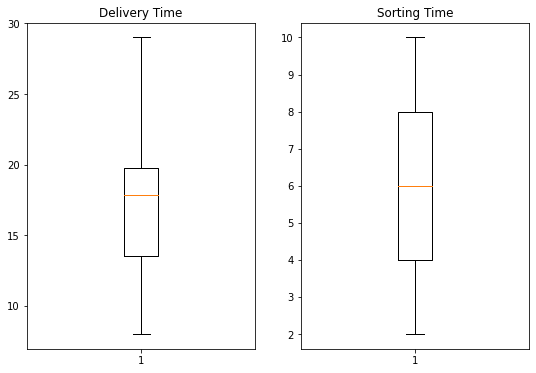

In [52]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df['Sorting Time'])
plt.title('Sorting Time')
plt.show()

## <font color='red'> As you can see there are no Outliers in the data 

# <font color = 'red'> Step 6

### Trying different transformation of data to estimate normal distribution and to remove any skewness

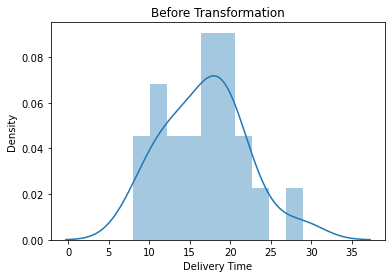

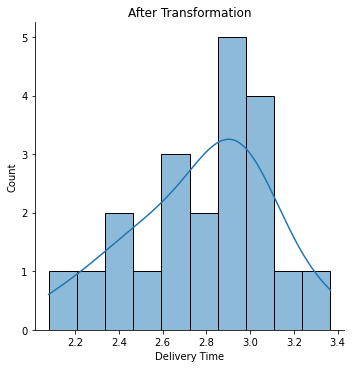

In [53]:
sns.distplot(df['Delivery Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

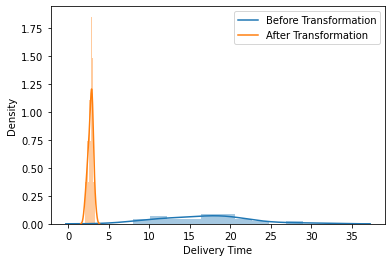

In [54]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Delivery Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

## <font color='red'> As you can see 
+ How log transformation affects the data and it scales the values down.
+ Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

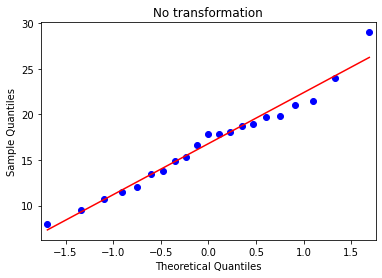

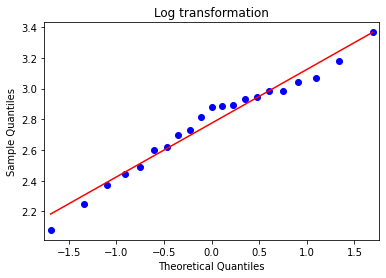

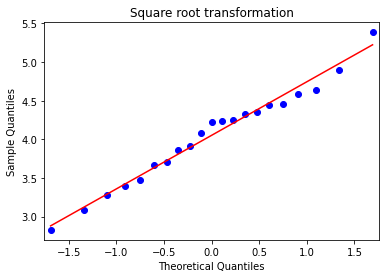

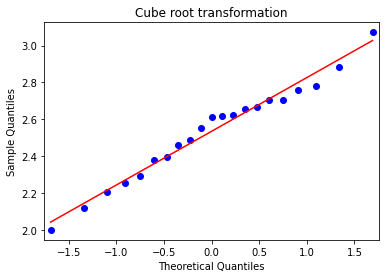

In [7]:
smf.qqplot(df['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Delivery Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

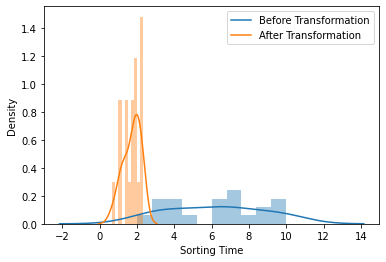

In [56]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Sorting Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

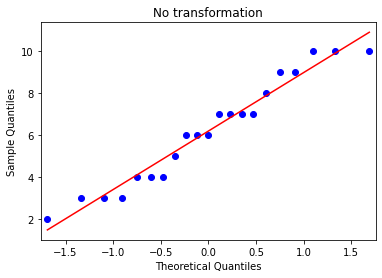

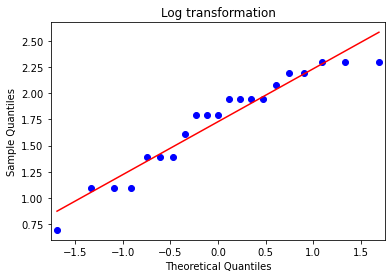

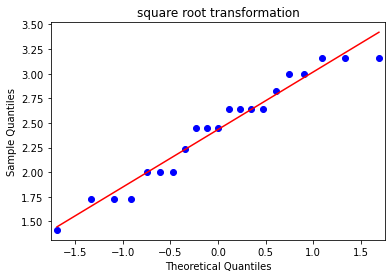

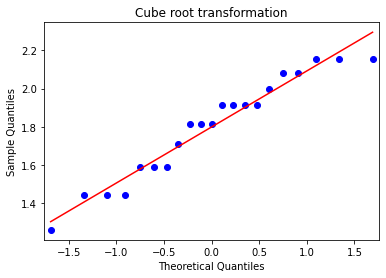

In [9]:
# <font color='red'>Important Note:</font> We only do any data transformation when the data is skewed or not normalsmf.qqplot(df['Sorting Time'], line = 'r')
smf.qqplot(df['Sorting Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Sorting Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Sorting Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['Sorting Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

# <font color='red'>Important Note:</font> 
+ We only Perform any data transformation when the data is skewed or not normal

# <font color = 'red'> Step 7

### Fitting a Linear Regression Model 

In [4]:
model = sm.ols('Delivery_Time~Sorting_Time', data = df1).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           3.98e-06
Time:                        11:23:22   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color='red'> As you can notice in the above model 
+ The R-squared and adjecent R-squared scores are still below 0.85.
+ (It is a thumb rule to consider Adjacent R-squared to be greater than 0.8 for a good model for prediction)
+ Lets Try some data transformation to check whether these scores can get any higher than this.

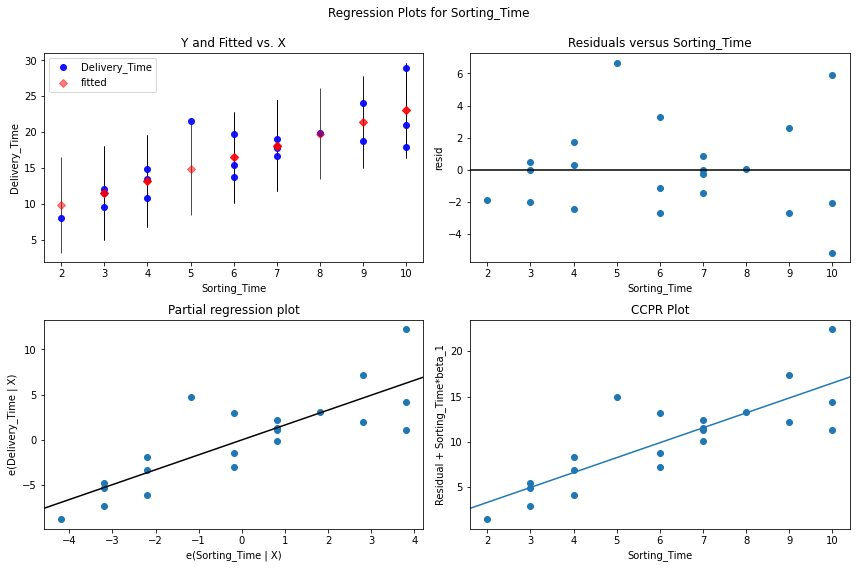

In [60]:
fig = plt.figure(figsize=(12,8))
fig = smf.graphics.plot_regress_exog(model, 'Sorting_Time', fig=fig)

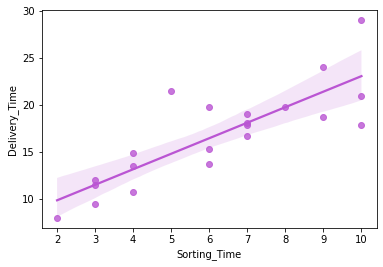

In [114]:
sns.regplot(x = 'Sorting_Time',  y = 'Delivery_Time', data = df1, color = 'mediumorchid')
plt.show()

### Log transformation on dependent variable

In [7]:
model1 = sm.ols('np.log(Delivery_Time)~Sorting_Time', data = df1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sun, 20 Mar 2022   Prob (F-statistic):           1.59e-06
Time:                           14:52:45   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color='red'> As you can notice in the above model
+ After log transformation on dependent Variable the R-squared and adjecent R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.
+ Lets Try some data transformation to check whether these scores can get any higher than this.

# Log transformation on both dependent as well as independent variable

In [8]:
model2 = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)', data = df1).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sun, 20 Mar 2022   Prob (F-statistic):           1.60e-07
Time:                           14:52:49   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_Time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color='red'> As you can notice in the above model
+ After log transformation on dependent Variable the R-squared and adjecent R-squared scores have increased but they are still below 0.85 which is a thumb rule we consider for a good model for prediction.
+ Lets Try some data transformation to check whether these scores can get any higher than this.

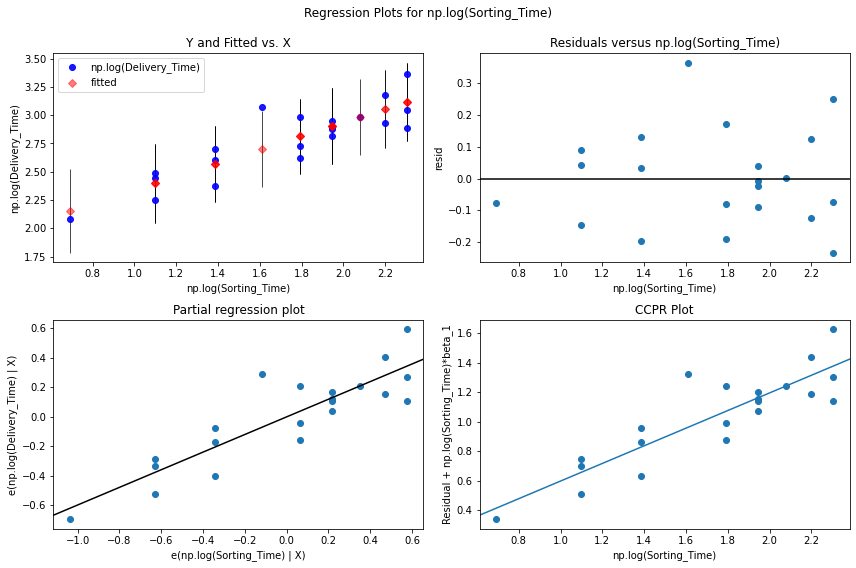

In [65]:
fig = plt.figure(figsize=(12,8))
fig = smf.graphics.plot_regress_exog(model2, 'np.log(Sorting_Time)', fig=fig)

### Log transformation on dependent and independent variable + square transformation on independent variable

In [9]:
model3 = sm.ols('np.log(Delivery_Time)~np.log(Sorting_Time)+np.square(Sorting_Time)', data = df1).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.777
Model:                               OLS   Adj. R-squared:                  0.752
Method:                    Least Squares   F-statistic:                     31.28
Date:                   Sun, 20 Mar 2022   Prob (F-statistic):           1.39e-06
Time:                           14:52:53   Log-Likelihood:                 10.496
No. Observations:                     21   AIC:                            -14.99
Df Residuals:                         18   BIC:                            -11.86
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.6279      0.234      6.948      0.000       1.136       2.120
np.log(Sorting_Time)        0.7081      0.200      3.537      0.002       0.287       1.129
np.square(Sorting_Time)    -0.0017      0.003     -0.597      0.558      -0.008       0.004
==============================================================================
Omnibus:                        1.794   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.408   Jarque-Bera (JB):                1.191
Skew:                           0.578   Prob(JB):                        0.551
Kurtosis:                       2.843   Cond. No.                         482.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color='red'> As you can notice in the above model 
+ After log transformation on both dependent and independent variable the R-squared and adjecent R-squared scores have increased 
+ But they are still below 0.85 which is a thumb rule we consider for a good model for prediction. 
+Yet it is now close to 0.8 which for a single feature/predictor variable or single independent variable is expected to be low. Hence , we can go ahead with this model

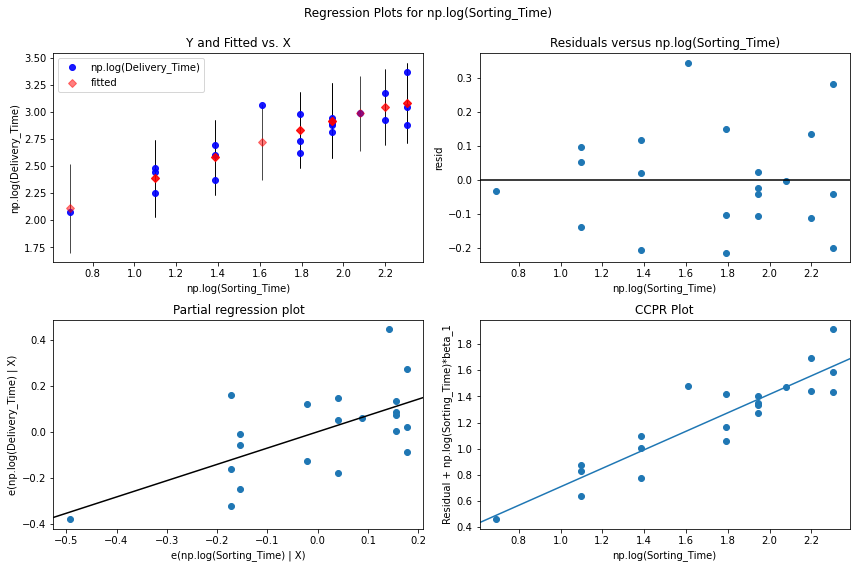

In [14]:
fig = plt.figure(figsize=(12,8))
fig = smf.graphics.plot_regress_exog(model3, 'np.log(Sorting_Time)', fig=fig)

### Plotting model to check the regression line 

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [49]:
lm = LinearRegression()

x = df['Sorting Time'].values.reshape(-1,1)
y = df['Delivery Time'].values.reshape(-1,1)

reg_sklearn = lm.fit(x,y)

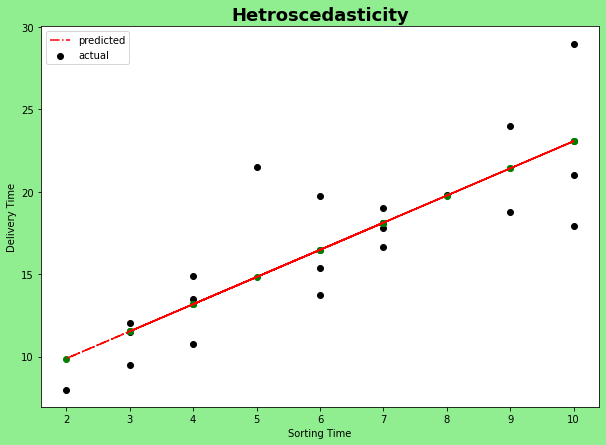

In [50]:
plt.figure(figsize=(10,7), facecolor ='lightgreen')
plt.scatter(df['Sorting Time'], df['Delivery Time'], color = 'black', label='actual')
plt.plot(df['Sorting Time'], reg_sklearn.predict(x), color = 'red', linestyle='-.', label = 'predicted')
plt.scatter(df['Sorting Time'], reg_sklearn.predict(x), color = 'green')
plt.xlabel('Sorting Time')
plt.ylabel("Delivery Time")
plt.title('Hetroscedasticity', fontsize = 18, fontweight = 'bold')
plt.legend(loc='best')
plt.show()

# <font color = 'red'> Step 8

### Model Validation
### We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value. 

### Comparing different models with respect to their Root Mean Squared Errors

In [11]:
from sklearn.metrics import mean_squared_error

In [18]:
model1_pred_y =np.exp(model1.predict(df1['Sorting_Time']))
model2_pred_y =np.exp(model2.predict(df1['Sorting_Time']))
model3_pred_y =np.exp(model3.predict(df1['Sorting_Time']))

In [19]:
model1_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df1['Delivery_Time'], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 2.9349037688901394 
model1= 2.940250323056201 
model2= 2.7458288976145497 
model3= 2.7477786819372008


In [20]:
data = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(data, key=data.get)

'model2'

## <font color='red'>As model2 has the minimum RMSE and highest Adjacent R-squared score. Hence, we are going to use model2 to predict our values 
+ Model2 is the model where we did log transformation on both dependent variable as well as on independent variables

# <font color = 'red'> Step 9

###  Predicting values

In [12]:
predicted = pd.DataFrame()
predicted['Sorting_Time'] = df1.Sorting_Time
predicted['Delivery_Time'] = df1.Delivery_Time
predicted['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(model2.predict(predicted.Sorting_Time)))
predicted

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


### Predicitng from Original Model without any data transformation

In [6]:
predicted1 = pd.DataFrame()
predicted1['Sorting_Time'] = df1.Sorting_Time
predicted1['Delivery_Time'] = df1.Delivery_Time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(model.predict(predicted1.Sorting_Time))
predicted1

,Sorting_Time,Delivery_Time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


# <font color = 'red'> Step 10

### Trying different models

In [21]:
model4 = sm.ols('np.log(Delivery_Time)~np.square(Sorting_Time)', data = df1).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.621
Model:                               OLS   Adj. R-squared:                  0.601
Method:                    Least Squares   F-statistic:                     31.18
Date:                   Sun, 20 Mar 2022   Prob (F-statistic):           2.20e-05
Time:                           15:24:18   Log-Likelihood:                 4.9564
No. Observations:                     21   AIC:                            -5.913
Df Residuals:                         19   BIC:                            -3.824
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.4290      0.076     32.014      0.000       2.270       2.588
np.square(Sorting_Time)     0.0078      0.001      5.584      0.000       0.005       0.011
==============================================================================
Omnibus:                        0.359   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.836   Jarque-Bera (JB):                0.004
Skew:                           0.033   Prob(JB):                        0.998
Kurtosis:                       3.000   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model5 = sm.ols('np.square(Delivery_Time)~np.square(Sorting_Time)', data = df1).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     np.square(Delivery_Time)   R-squared:                       0.588
Model:                                  OLS   Adj. R-squared:                  0.567
Method:                       Least Squares   F-statistic:                     27.14
Date:                      Sun, 20 Mar 2022   Prob (F-statistic):           4.99e-05
Time:                              15:24:28   Log-Likelihood:                -129.24
No. Observations:                        21   AIC:                             262.5
Df Residuals:                            19   BIC:                             264.6
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 114.1548     45.231      2.524      0.021      19.485     208.825
np.square(Sorting_Time)     4.3239      0.830      5.209      0.000       2.587       6.061
==============================================================================
Omnibus:                        5.851   Durbin-Watson:                   1.224
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                3.524
Skew:                           0.865   Prob(JB):                        0.172
Kurtosis:                       4.018   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model6 = sm.ols('np.log(Delivery_Time)~pow(Sorting_Time,3)', data = df1).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_Time)   R-squared:                       0.535
Model:                               OLS   Adj. R-squared:                  0.511
Method:                    Least Squares   F-statistic:                     21.90
Date:                   Sun, 20 Mar 2022   Prob (F-statistic):           0.000163
Time:                           15:24:34   Log-Likelihood:                 2.8096
No. Observations:                     21   AIC:                            -1.619
Df Residuals:                         19   BIC:                            0.4699
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.5361      0.070     36.011      0.000       2.389       2.684
pow(Sorting_Time, 3)     0.0007      0.000      4.679      0.000       0.000       0.001
==============================================================================
Omnibus:                        0.389   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.186
Skew:                          -0.215   Prob(JB):                        0.911
Kurtosis:                       2.836   Cond. No.                         705.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model9 = sm.ols('pow(Delivery_Time,3)~pow(Sorting_Time,3)', data = df1).fit()
model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     pow(Delivery_Time, 3)   R-squared:                       0.507
Model:                               OLS   Adj. R-squared:                  0.481
Method:                    Least Squares   F-statistic:                     19.53
Date:                   Sun, 20 Mar 2022   Prob (F-statistic):           0.000295
Time:                           15:25:04   Log-Likelihood:                -202.45
No. Observations:                     21   AIC:                             408.9
Df Residuals:                         19   BIC:                             411.0
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             2047.9556   1237.652      1.655      0.114    -542.479    4638.391
pow(Sorting_Time, 3)    11.2475      2.545      4.419      0.000       5.920      16.575
==============================================================================
Omnibus:                       10.080   Durbin-Watson:                   1.252
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                8.219
Skew:                           1.064   Prob(JB):                       0.0164
Kurtosis:                       5.205   Cond. No.                         705.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# As you can see above the adjacent R-squared value is getting lower there is no point on going forward